# Big Data & BI – Optional Intro Notebook

**Topic:** Data, EDA


## Learning Objectives
By the end, you can:
- Download a real dataset from the open source projects.
- Evaluate a list of **KPIs**.
- Run simple analysis.


- Open "https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/GTNEJD"
- Download peoplesun_hh_anon.tab as csv (comma seperated valaues).
- Files named peoplesun_hh_odk_codebook.xlsx and peoplesun_hh_odk_choices.xlsx are also needed to decode the questions and answers.
- Place it in your data folder

## Key Performance Indicators (KPIs)

### KPI 1 — Electrification Rate (%)
**Definition:** Percentage of households with any access to electricity (grid or off-grid like solar/generator).  
**Formula:** Electrification Rate = (Households_with_electricity / Total_households) * 100  
**Purpose:** Measures extent of access.

---

### KPI 2 — Supply Reliability (Outages or Hours Without Power)
**Definition:** Average number of power outages per week OR hours without power per day among connected households.  
**Formula (example):** Avg_outages_per_week = SUM(outages_per_week) / N_connected_households  
**Purpose:** Captures quality/stability of supply.

---

### KPI 3 — Energy Burden (%)
**Definition:** Average share of monthly household spending (or income) devoted to electricity expenses.  
**Formula:** Energy_Burden = (Electricity_expenditure / Total_expenditure_or_income) * 100  
**Purpose:** Assesses affordability.


## 1) Setup & load

In [ ]:
# pip install matplotlib

SyntaxError: invalid syntax (4076348996.py, line 2)

In [32]:
# pip install seaborn

In [35]:
# --- setup ---
import pandas as pd
import numpy as np
import re
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = Path("../data/peoplesun_hh_anon.csv")  # students: place file here

# Helpful options
pd.set_option("display.max_colwidth", 120)
pd.set_option("display.max_columns", 120)

# --- load ---
# If the CSV has a different delimiter, change sep="," accordingly.
df = pd.read_csv(DATA_PATH, sep=",", low_memory=False)

print("Rows:", len(df))
df.head()


Rows: 3599


,zone,state,eaid,lga,urca_cat,hhid,q102,q103,q104,q105,q106,q107,q108,q109,q110,q201,q202,q203_1,q203_2,q203_3,q203_4,q204,q205,q206,q207_1,q207_2,q207_3,q208,q209,q210,q210_1,q211,q211__1,q211__2,q211__3,q211__4,q211__5,q211__6,q211__7,q211__8,q211__9,q211__10,q211__11,q211__12,q211__0,q211__96,q211_1,q212,q212_1,q213,q213_1,q213_1__1,q213_1__2,q213_1__96,q214,q214__1,q214__2,q214__3,q214__4,q214__5,...,q402__4,q402__5,q402__6,q404,q404__1,q404__2,q404__3,q404__4,q404__5,q404__6,q404__7,q404__8,q404__9,q404__10,q404__11,q404__0,q404__96,q404_1,q405,q405_1,q405_1__1,q405_1__2,q405_1__3,q405_1__4,q405_1__5,q405_1__6,q405_1__7,q405_1__8,q405_1__9,q405_1__10,q405_1__11,q405_1__12,q405_1__13,q405_1__96,q405_2,q501,q501__1,q501__2,q501__3,q501__4,q501__5,q501__96,q503,q503__1,q503__2,q503__3,q503__4,q503__5,q503__6,q503__99,q503__96,q503__98,q503_1,q604_1,q604_2,q604_3,q604_4,q604_5,q604_6,natweight
0,North Central,Niger,NI_197,mashegu,<1hr to small city/town+,d8af8ab5-30ab-4d9f-bfe4-81231dbe5dbf,1,NaN,1,1,36,2,NaN,NaN,NaN,5,4,13,4,1,0,2,8,6,0,2,0,22,14,96,Politics,2 96,0,1,0,0,0,0,0,0,0,0,0,0,0,1,Politics and farming for consumption,1,1.0,1,1,1.0,0.0,0.0,1 11,1,0,0,0,0,...,1,0,1,2 11,0,1,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1,1,0,0,0,0,0,NaN,0,0,NaN,4,2,3,2,3,3,0.039141
1,North Central,Niger,NI_197,mashegu,<1hr to small city/town+,e8245d5c-8130-4e78-b4b0-1053b7ecbc9b,1,NaN,1,1,60,2,NaN,NaN,NaN,6,2,4,3,2,1,3,9,6,0,0,0,14,13,1,NaN,1 3 96,1,0,1,0,0,0,0,0,0,0,0,0,0,1,Farming for consumption,0,NaN,1,1,1.0,0.0,0.0,11,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1,1,0,0,0,0,0,NaN,0,0,NaN,4,2,3,1,3,3,0.039141
2,North West,Kano,KN_104,garun_malam,<1hr to large city,435c8e27-517a-46b9-af04-48830e086d7a,1,NaN,1,1,45,1,NaN,NaN,NaN,3,6,3,2,1,0,1,5,6,1,1,0,14,8,2,NaN,2 8,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1,1.0,1,1,1.0,0.0,0.0,11,0,0,0,0,0,...,1,0,1,11,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1,1,0,0,0,0,0,0.0,0,0,NaN,4,3,4,2,4,1,0.109779
3,North West,Kano,KN_104,garun_malam,<1hr to large city,9303fa53-9fd2-41a9-9f0d-9567dbe5168e,1,NaN,1,1,47,1,NaN,NaN,NaN,3,15,7,2,1,0,1,10,6,3,1,0,14,8,2,NaN,2 7,0,1,0,0,0,0,1,0,0,0,0,0,0,0,NaN,1,1.0,0,NaN,NaN,NaN,NaN,11,0,0,0,0,0,...,1,1,1,2 11 1,1,1,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1 2,1,1,0,0,0,0,0.0,0,0,NaN,4,3,4,3,4,2,0.109779
4,North West,Kano,KN_104,garun_malam,<1hr to large city,c62cc5a5-29c5-423b-9543-a7b05bda454b,1,NaN,1,1,45,1,NaN,NaN,NaN,2,1,4,1,1,0,2,3,6,0,1,0,24,24,2,NaN,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,11,0,0,0,0,0,...,0,0,0,11,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1 2,1,1,0,0,0,0,0.0,0,0,NaN,4,2,4,2,4,2,0.109779


## 2) Quick EDA (Exploratory Data Analysis)

In [44]:
# --- explore ---
missing = df.isnull().sum()

In [41]:
df.dtypes
df=df.fillna(0)

In [29]:
df.head()

,zone,state,eaid,lga,urca_cat,hhid,q102,q103,q104,q105,q106,q107,q108,q109,q110,q201,q202,q203_1,q203_2,q203_3,q203_4,q204,q205,q206,q207_1,q207_2,q207_3,q208,q209,q210,q210_1,q211,q211__1,q211__2,q211__3,q211__4,q211__5,q211__6,q211__7,q211__8,q211__9,q211__10,q211__11,q211__12,q211__0,q211__96,q211_1,q212,q212_1,q213,q213_1,q213_1__1,q213_1__2,q213_1__96,q214,q214__1,q214__2,q214__3,q214__4,q214__5,...,q402__4,q402__5,q402__6,q404,q404__1,q404__2,q404__3,q404__4,q404__5,q404__6,q404__7,q404__8,q404__9,q404__10,q404__11,q404__0,q404__96,q404_1,q405,q405_1,q405_1__1,q405_1__2,q405_1__3,q405_1__4,q405_1__5,q405_1__6,q405_1__7,q405_1__8,q405_1__9,q405_1__10,q405_1__11,q405_1__12,q405_1__13,q405_1__96,q405_2,q501,q501__1,q501__2,q501__3,q501__4,q501__5,q501__96,q503,q503__1,q503__2,q503__3,q503__4,q503__5,q503__6,q503__99,q503__96,q503__98,q503_1,q604_1,q604_2,q604_3,q604_4,q604_5,q604_6,natweight
0,North Central,Niger,NI_197,mashegu,<1hr to small city/town+,d8af8ab5-30ab-4d9f-bfe4-81231dbe5dbf,1,0.0,1,1,36,2,0.0,0.0,0.0,5,4,13,4,1,0,2,8,6,0,2,0,22,14,96,Politics,2 96,0,1,0,0,0,0,0,0,0,0,0,0,0,1,Politics and farming for consumption,1,1.0,1,1,1.0,0.0,0.0,1 11,1,0,0,0,0,...,1,0,1,2 11,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0,0,1,0,0,1,1,0,0,0,0,0,0.0,0,0,0,4,2,3,2,3,3,0.039141
1,North Central,Niger,NI_197,mashegu,<1hr to small city/town+,e8245d5c-8130-4e78-b4b0-1053b7ecbc9b,1,0.0,1,1,60,2,0.0,0.0,0.0,6,2,4,3,2,1,3,9,6,0,0,0,14,13,1,0,1 3 96,1,0,1,0,0,0,0,0,0,0,0,0,0,1,Farming for consumption,0,0.0,1,1,1.0,0.0,0.0,11,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0,0,1,0,0,1,1,0,0,0,0,0,0.0,0,0,0,4,2,3,1,3,3,0.039141
2,North West,Kano,KN_104,garun_malam,<1hr to large city,435c8e27-517a-46b9-af04-48830e086d7a,1,0.0,1,1,45,1,0.0,0.0,0.0,3,6,3,2,1,0,1,5,6,1,1,0,14,8,2,0,2 8,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1.0,1,1,1.0,0.0,0.0,11,0,0,0,0,0,...,1,0,1,11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0,0,1,0,0,1,1,0,0,0,0,0,0.0,0,0,0,4,3,4,2,4,1,0.109779
3,North West,Kano,KN_104,garun_malam,<1hr to large city,9303fa53-9fd2-41a9-9f0d-9567dbe5168e,1,0.0,1,1,47,1,0.0,0.0,0.0,3,15,7,2,1,0,1,10,6,3,1,0,14,8,2,0,2 7,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1.0,0,0,0.0,0.0,0.0,11,0,0,0,0,0,...,1,1,1,2 11 1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0,0,1,0,0,1 2,1,1,0,0,0,0,0.0,0,0,0,4,3,4,3,4,2,0.109779
4,North West,Kano,KN_104,garun_malam,<1hr to large city,c62cc5a5-29c5-423b-9543-a7b05bda454b,1,0.0,1,1,45,1,0.0,0.0,0.0,2,1,4,1,1,0,2,3,6,0,1,0,24,24,2,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,11,0,0,0,0,0,...,0,0,0,11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0,0,1,0,0,1 2,1,1,0,0,0,0,0.0,0,0,0,4,2,4,2,4,2,0.109779


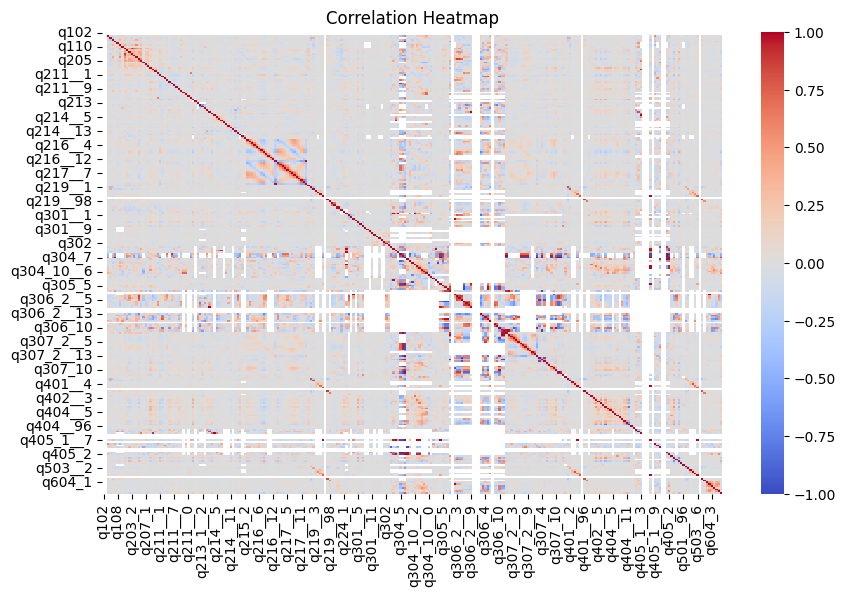

In [36]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

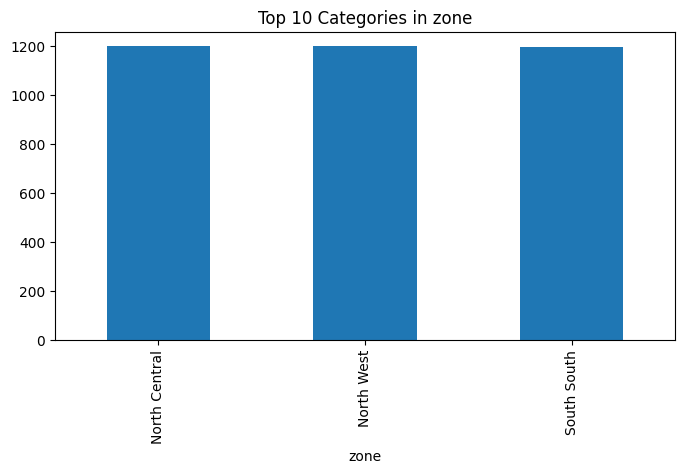

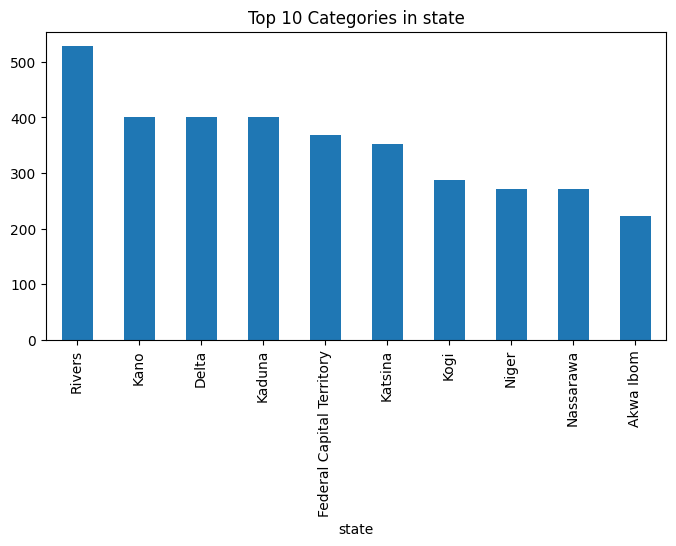

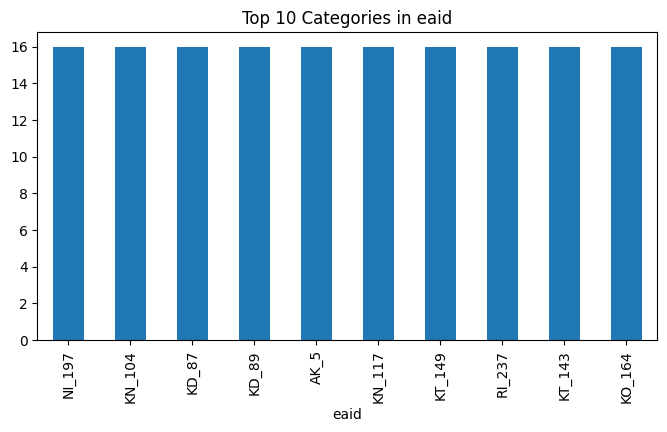

In [37]:
catagorical_df = df.select_dtypes(include=['object']).columns
for col in catagorical_df[:3]:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 Categories in {col}')
    plt.show()

In [38]:
print(numeric_df.describe().T)

            count       mean        std        min        25%        50%  \
q102       3599.0   1.000000   0.000000   1.000000   1.000000   1.000000   
q103          0.0        NaN        NaN        NaN        NaN        NaN   
q104       3599.0   2.098639   6.920978   1.000000   1.000000   1.000000   
q105       3599.0   1.359822   0.480015   1.000000   1.000000   1.000000   
q106       3599.0  42.034454  13.184644  18.000000  32.000000  40.000000   
...           ...        ...        ...        ...        ...        ...   
q604_3     3599.0   3.180884   8.016958   1.000000   2.000000   2.000000   
q604_4     3599.0   2.766324   8.707438   1.000000   1.000000   2.000000   
q604_5     3599.0   3.301473   7.368410   1.000000   2.000000   3.000000   
q604_6     3599.0   3.682134  11.200040   1.000000   2.000000   2.000000   
natweight  3599.0   0.117035   0.080032   0.026126   0.069566   0.094781   

                 75%         max  
q102        1.000000    1.000000  
q103             

## 3) KPI 1 — Electrification Rate (%)

In [45]:
# --- explore ---

## 4) KPI 2 — Reliability (choose the best available)

In [ ]:
# --- explore ---

## 5) KPI 3 — Energy Burden (% of total monthly expenditure or income)

In [5]:
# --- explore ---